In [1]:
#Importing Initial Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Excel File
df = pd.read_excel('BengaluruHouseData.xlsx')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,2023-12-19 00:00:00,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df['location'].unique().shape

(1306,)

In [6]:
#Droping unwanted columns
df = df.drop(['area_type','society','availability'], axis=1)
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
#Droping rows where location or size column is None
df = df.dropna(subset=['location','size'], axis=0)
df.shape

(13303, 6)

In [9]:
df['bath'].median()

2.0

In [10]:
#Filling None values of bath column with median of bath column
df['bath'].fillna(df['bath'].median(), inplace=True)
df.isnull().sum()

location        0
size            0
total_sqft      0
bath            0
balcony       593
price           0
dtype: int64

In [11]:
#Filling None values of balcony column with 0
df['balcony'].fillna(0, inplace=True)
df.describe()

,bath,balcony,price
count,13303.000000,13303.000000,13303.000000
mean,2.689619,1.513719,112.584033
std,1.339393,0.863189,148.993820
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [12]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
#cleaning size column and creating new bhk column
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
#Drop size column
df.drop('size', axis=1, inplace=True)
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [15]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df[df['bhk'] > 20]

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


In [17]:
df['total_sqft'].unique()

array([1056, 2600, 1440, ..., '1133 - 1384', 774, 4689], dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df[~df['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,0.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,0.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13240,Devanahalli,1020 - 1130,2.0,0.0,52.570,1
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [20]:
# Defining a function to convert range value into average of range
def convert_sqft_to_num(x):
    if type(x) == str:
        token = x.split('-')
        if len(token) == 2:
            return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [22]:
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [23]:
df.iloc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [24]:
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [25]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [26]:
len(df['location'].unique())

1304

In [27]:
#location doesn't have extra space
df['location'] = df['location'].apply(lambda x: x.strip())

In [28]:
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [29]:
len(location_stats[location_stats<=10])

1052

In [30]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [31]:
len(df['location'].unique())

1293

In [32]:
df['location'] = df['location'].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [33]:
len(df['location'].unique())

242

In [34]:
#Data Errors
df[df['total_sqft']/df['bhk']<300].head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,1020.0,6.0,0.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,0.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000


In [35]:
df = df[~(df['total_sqft']/df['bhk']<300)]

In [36]:
df.shape

(12559, 7)

In [37]:
df['price_per_sqft'].describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        sd = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft']>(m-sd)) & (subdf['price_per_sqft']<(m+sd))] #95%
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [39]:
df = remove_pps_outliers(df)
df.shape

(10286, 7)

In [40]:
df['price_per_sqft'].describe()

count    10286.000000
mean      5659.999439
std       2265.627947
min       1250.000000
25%       4250.000000
50%       5176.359705
75%       6428.571429
max      24509.803922
Name: price_per_sqft, dtype: float64

In [41]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2['total_sqft'], bhk2['price_per_sqft'], color='blue', label = '2 BHK',s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price_per_sqft'], color='green', marker='+', label = '3 BHK',s=50)
    plt.xlabel('Total Square Feet Area') 
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()   

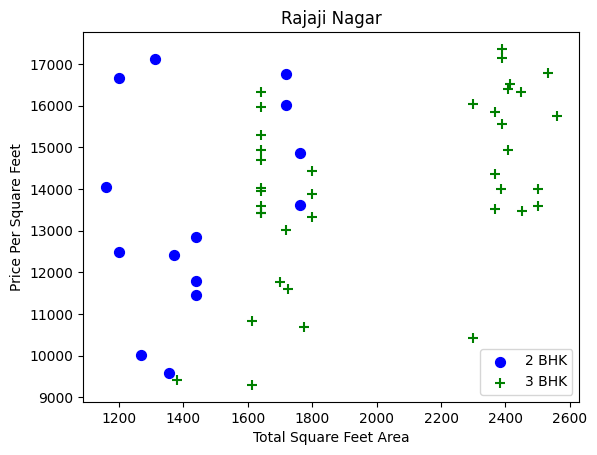

In [42]:
plot_scatter_chart(df, "Rajaji Nagar")

In [43]:
df[(df['location']=='Rajaji Nagar') & (df['bhk'] == 2) & ((df['total_sqft']< 1800) & (df['total_sqft']> 1700))]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
5770,Rajaji Nagar,1718.0,3.0,2.0,288.0,2,16763.678696
5792,Rajaji Nagar,1763.0,3.0,2.0,262.0,2,14861.032331
5818,Rajaji Nagar,1718.0,3.0,2.0,275.0,2,16006.984866
5819,Rajaji Nagar,1763.0,3.0,2.0,240.0,2,13613.159387


In [44]:
df[(df['location']=='Rajaji Nagar')& (df['bhk']==3)& ((df['total_sqft']< 1800) & (df['total_sqft']> 1700))]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
5757,Rajaji Nagar,1725.0,3.0,3.0,200.0,3,11594.202899
5790,Rajaji Nagar,1776.0,3.0,1.0,190.0,3,10698.198198
5809,Rajaji Nagar,1720.0,3.0,2.0,224.0,3,13023.255814


In [45]:
#we need to clean the outliers because we know 2bhk can't be more expensive than 3bhk in same location

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis=0)

In [46]:
df = remove_bhk_outliers(df)
df.shape

(7353, 7)

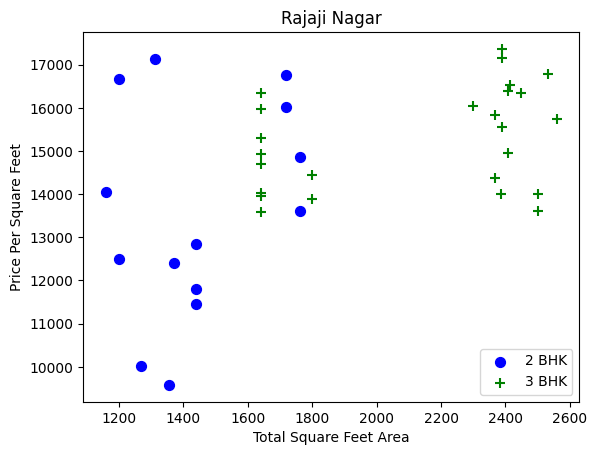

In [47]:
plot_scatter_chart(df, "Rajaji Nagar")
#plot_scatter_chart(df, "Hebbal")

Text(0, 0.5, 'Count')

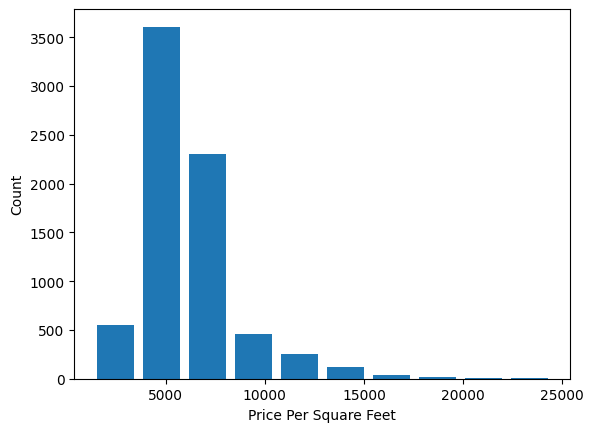

In [48]:
plt.hist(df['price_per_sqft'],rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [49]:
df[df['bath']>10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
5306,Neeladri Nagar,4000.0,12.0,0.0,160.0,10,4000.000000
8530,other,12000.0,12.0,0.0,525.0,10,4375.000000
8619,other,10000.0,16.0,0.0,550.0,16,5500.000000
9352,other,6000.0,12.0,0.0,150.0,11,2500.000000
9683,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [50]:
df[df['bath'] > (df['bhk']+2)]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1634,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5267,Nagasandra,7000.0,8.0,0.0,450.0,4,6428.571429
6748,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8455,other,11338.0,9.0,1.0,1000.0,6,8819.897689


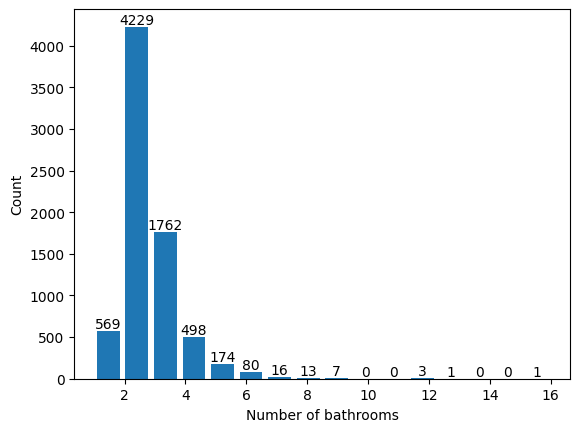

In [51]:
counts, bins, patches = plt.hist(df['bath'],rwidth=0.8,bins=16)

for i, patch in enumerate(patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    plt.text(x, y, int(counts[i]), ha='center', va='bottom')

plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
plt.show()

In [52]:
df = df[~(df['bath']>(df['bhk']+2))]
df.shape

(7349, 7)

In [53]:
df.drop(['price_per_sqft'],axis=1,inplace=True)
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [54]:
location_dummies = pd.get_dummies(df['location'],drop_first=False)
location_dummies.shape

(7349, 242)

In [55]:
df = pd.concat([df.drop('location',axis=1),location_dummies.drop('other',axis=1)],axis=1)
df.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X = df.drop('price',axis=1)
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y = df['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

(cross_val_score(LinearRegression(), X, y,cv=cv)).mean()

0.837764503968868

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

In [62]:
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {

        }
    },
    'lasso': {
        'model': Lasso(max_iter=100000),
        'params': {
            'alpha': [1,2],
            'selection': ['random','cyclic']
        }
    },
    'ridge': {
        'model': Ridge(max_iter=100000),
        'params': {
            'alpha': [1,2]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'splitter': ['best','random']
        }
    },
    'svr': {
        'model': SVR(max_iter=10000000),
        'params': {
         
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [1,5,10,20,50]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [1,5,10,20,50],
            'learning_rate': [0.001,0.01,0.1,0.5]
        }
    }
}

In [63]:
scores= []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
for algo_name, mp in algos.items():
   reg = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
   reg.fit(X, y)
   scores.append(
      {
         'model': algo_name,
         'best_score': reg.best_score_,
         'best_params': reg.best_params_
      }
   ) 

In [64]:
score = pd.DataFrame(scores, columns=['model','best_score','best_params'])
score

,model,best_score,best_params
0,linear_regression,0.837765,{}
1,lasso,0.701615,"{'alpha': 1, 'selection': 'cyclic'}"
2,ridge,0.834550,{'alpha': 1}
3,decision_tree,0.702948,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
4,svr,0.510320,{}
5,random_forest,0.733073,{'n_estimators': 20}
6,gradient_boosting,0.724656,"{'learning_rate': 0.1, 'n_estimators': 50}"


In [66]:
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test, y_test)

0.864320466106999

In [67]:
def predict_price(location, sqft,bath,balcony,bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x= np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    return reg.predict([x])[0]

In [68]:
predict_price('1st Phase JP Nagar',1000,3,1,3)

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.65715960225047

In [72]:
predict_price('1st Phase JP Nagar',1000,2,1,2)

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.8161813898974

In [73]:
predict_price('Indira Nagar',1000,3,1,3)

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


185.1460188635877

In [74]:
import pickle

In [75]:
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(reg,f)

In [76]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [79]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    json.dump(columns,f)